<a href="https://colab.research.google.com/github/leabizbille/ProjetIOT/blob/main/AIH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install summarytools -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.9 MB/s eta 0:00:00


In [2]:
!pip install pygwalker -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 956.2/956.2 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.7/213.7 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.4/727.4 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 62.7 MB/s eta 0:00:00


In [3]:
pip install sweetviz -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 50.4 MB/s eta 0:00:00


In [4]:
import pygwalker as pyg
from summarytools import dfSummary # module pandas-profiling
import pandas as pd
import sweetviz as sv # Module pour faire le rapport HTML
import missingno as msno

In [26]:
# Charger le fichier CSV en conservant les titres des colonnes
AIH= pd.read_csv("/content/AIH_2024.csv",sep= ";")


<Axes: >

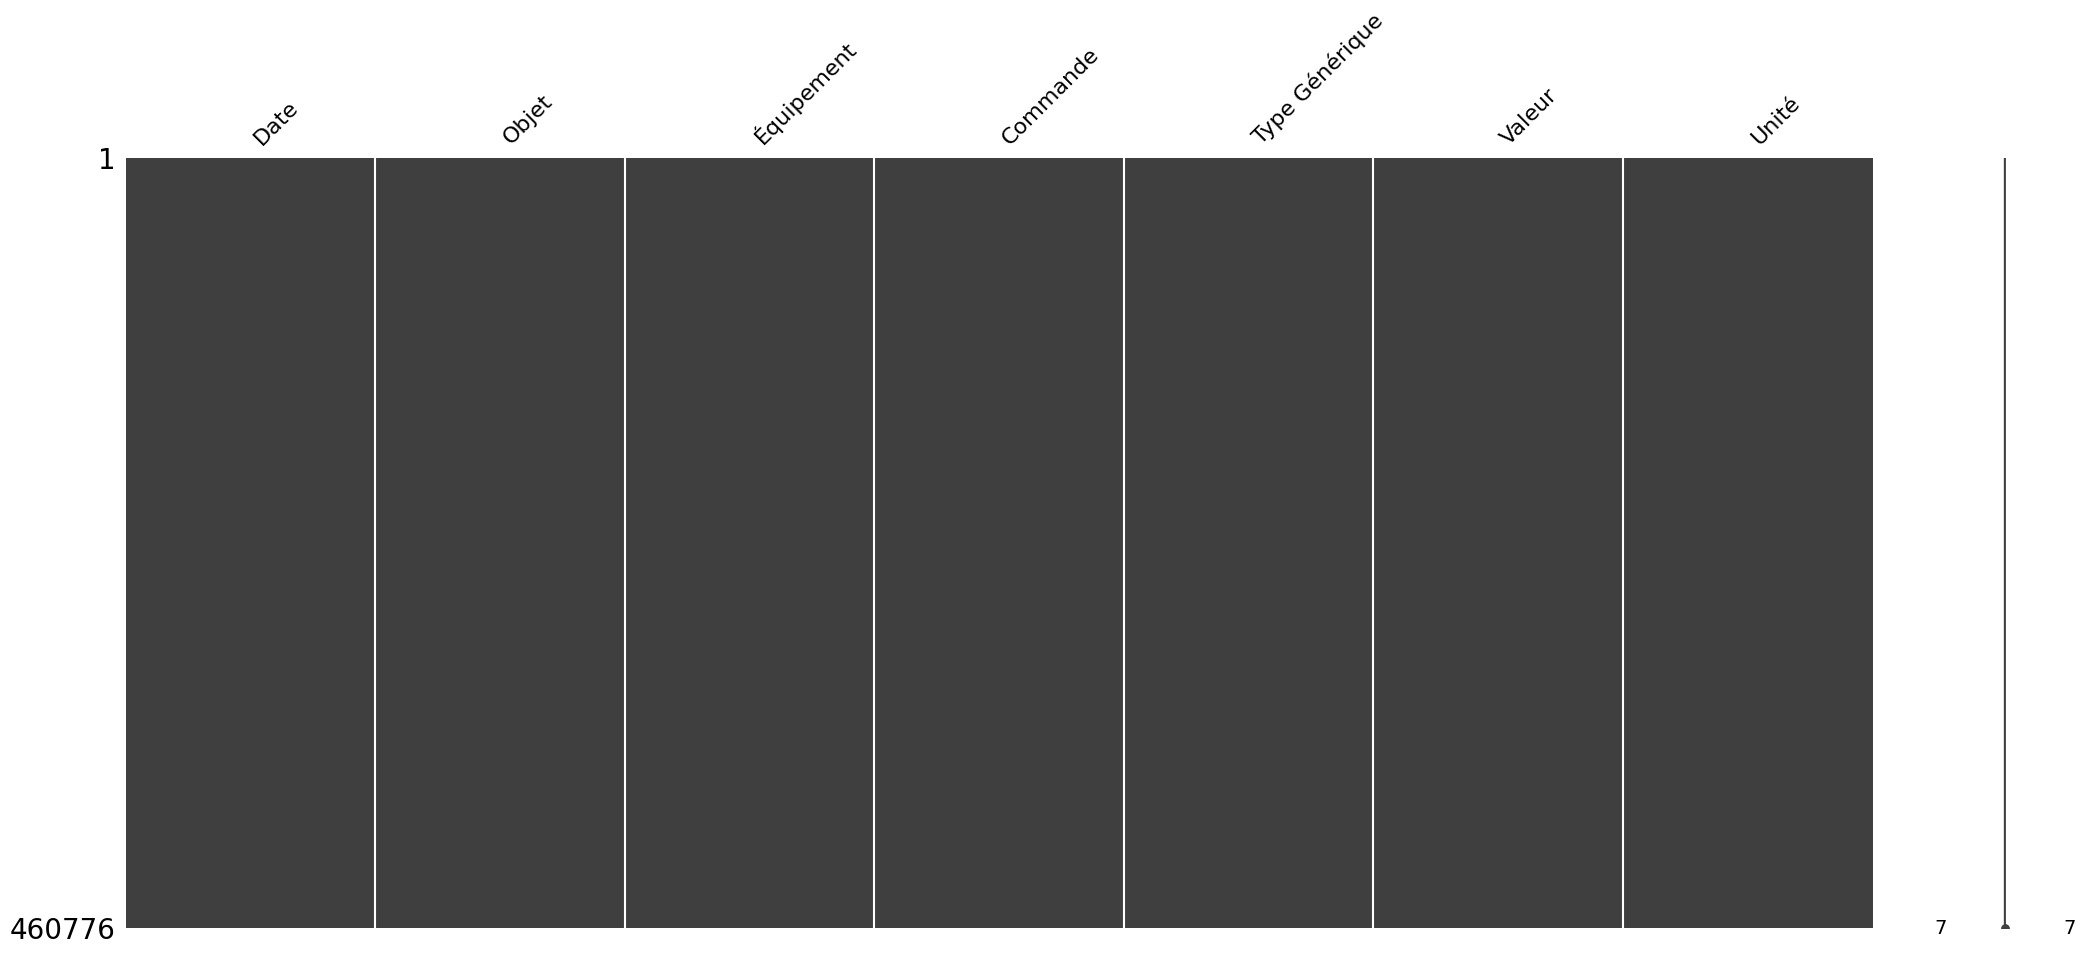

In [27]:
msno.matrix(AIH)

In [28]:
# Description pour comprendre les données et mettre en suite le tableau en forme
dfSummary(AIH)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Date[object],1. 2020-08-07 16:40:002. 2021-12-06 14:57:053. 2020-08-07 16:45:004. 2022-09-15 11:00:005. 2021-12-06 14:57:046. 2021-06-05 11:00:007. 2023-08-06 10:00:008. 2023-01-31 13:05:009. 2021-06-01 19:00:0010. 2022-11-21 12:00:0011. other,"6 (0.0%)5 (0.0%)4 (0.0%)3 (0.0%)3 (0.0%)3 (0.0%)3 (0.0%)3 (0.0%)3 (0.0%)3 (0.0%)460,740 (100.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADLklEQVR4nO3cwY3TYBRG0ecogmFja2QpJUAPKYItvdOFNzCswoIeriVzTgX/4kpPkfxleb1eA4Xb2Q/g/yE2MmIjIzYyYiMjNjJiIyM2MmIjIzYyt2VZvi3L8nb2Q7i+28x8nZnPZz+E63NGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MbWZ+zsyfsx/C9S3+xYiKM0pGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEZGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkREbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKJllZr7MzKezH8L13fd9/76u6/vZD+H67uu6vj+fz9/btn2c/Riu6ziOt/vMzLZtH4/H49fZD+La/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjc5/59/nH2Q/h2o7jeFv2ff/h40kKPgsnY11Fxg8EMmIjIzYyYiMjNjJiIyM2MmIjIzYyfwFj50uCzHpkKgAAAABJRU5ErkJggg=="">",0(0.0%)
2,Objet[object],1. Sonde,"460,776 (100.0%)",,0(0.0%)
3,Équipement[object],1. Sonde_A16_SE_892. Sonde_A14_SE_873. Sonde_A13_SW_864. Sonde_A17_SW_805. Sonde_A01_SW_746. Sonde_A08_SW_717. Sonde_D23_SW_968. J6_Sonde extérieure Bat D9. Sonde_A11_SW_8410. Sonde_D25_S+W_9811. other,"49,219 (10.7%)47,767 (10.4%)46,846 (10.2%)46,768 (10.1%)42,019 (9.1%)41,624 (9.0%)40,782 (8.9%)34,567 (7.5%)33,327 (7.2%)28,365 (6.2%)49,492 (10.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAD80lEQVR4nO3dQWojRwCG0VIQQ2YjYQw+jA+Rw+YQuo0x1iIzzEZZZBtlurrEF/C8t7fQ4qNEN/27D7fbbUDht//7C/DrEBsZsZERGxmxkREbGbGRERsZsZE5jDG+jjG+LH7Oj9vt9u0B34dP7Pj8/PzH6XR6WvmQ6/X6fjgc/hQc/+V4Op2eXl9fv53P5+97PuDj4+P3y+Xy9Pb29mWMITbuOo4xxvl8/v7y8vLXwud8fdD34RNzgUBGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGSOY/zzTNreD1j5W34tx+v1+n65XJ7GwjNp1+v1fYzx43Ffi8/IBoHMwb/MovKIk82pxibL6yrLKrZaWldZVjHjEesqyyo2cVOXjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzNLgxdiFGcuDF2MXtvJYOBmDFzJONjIGL2QMXsgYvJBxU5eM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyHgsnY/BCxgUCGT+jZKyryFhXkbGuIuMCgYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYx1FRnrKjIeCydjXUVm5WRzojFl9+DF0IVZuwYvhi7ssTJ4MXRhipu6ZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZHYNXgxd2GP34MXQhVkeCydj8ELGyUbG4IWMwQsZgxcybuqSERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZ6yoy1lVkbBDIWFeRcbKRsa4iY11FxrqKjJu6ZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kPFYOBmDFzJ7TjYnGrtMD14MXdhravBi6MKKPYMXQxd2cVOXjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzNTgxdCFFdODF0MX9vJYOBmDFzIuEMjM/oz6CWW3qXWVZRUrNq+rLKtYNbuusqxiNxcIZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZDavqyyrWDW1rrKsYoXHwslYV5GZOdmcaizZPHgxdmHVpsGLsQuPMDN4MXZhiZu6ZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZDYNXoxdeITNgxdjF1Z5LJyMwQuZPS9K+zdOPX5q6g0v9xjDsMXmN7zcYwzDVrNveLnHGIafclOXjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzOY3vNxjDMNWU294uccYhi08Fk7G4IWMCwQyYiMjNjJiIyM2MmIjIzYyYiMjNjJ/A5lrTuIhgNUFAAAAAElFTkSuQmCC"">",0(0.0%)
4,Commande[object],1. Température2. Température 4,"399,307 (86.7%)61,469 (13.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG9

- Enlever la colonne " Type Générique", car l'ensemble des valeurs = "Temperature".

- Enlever la colonne " Objet", car l'ensemble des valeurs = "Sonde".

Pour toutes les colonnes, reformater les données.
Un pivotement ou une transposition du tableau sera probablement nécessaire.

In [29]:
# Séparer la colonne 'datetime' en deux colonnes distinctes
AIH[['date', 'time']] = AIH['Date'].str.split(' ', expand=True)

# Convertir les nouvelles colonnes au format datetime
AIH['date'] = pd.to_datetime(AIH['date'], format='%Y-%m-%d')
AIH['time'] = pd.to_datetime(AIH['time'], format='%H:%M:%S').dt.time

# Supprimer l'ancienne colonne si elle n'est plus nécessaire
AIH= AIH.drop(columns=['Objet'])

In [30]:
# Trouver toutes les modalités uniques dans la colonne 'Équipement'
modalites = val_roland['Équipement'].unique()

# Afficher les modalités
print(modalites)

['Sonde_A08_SW_71' 'Sonde_A01_SW_74' 'Sonde_A03_SE_76' 'Sonde_A17_SW_80'
 'Sonde_A11_SW_84' 'Sonde_A13_SW_86' 'Sonde_A14_SE_87' 'Sonde_D23_SW_96'
 'Sonde_A16_SE_89' 'Sonde_D25_S+W_98' 'J2_Sonde extérieure  Bat A1'
 'J6_Sonde extérieure  Bat D']


In [49]:
# Fonction de nettoyage
def nettoyer_equipement(data):
    if data.startswith('Sonde'):
        # Séparer les parties par "_"
        parts = data.split('_')
        return parts[0], parts[1], parts[2], parts[3] if len(parts) > 3 else None
    elif data.startswith('J'):
        # Séparer les parties par espace pour traiter les cas "J2_Sonde extérieure  Bat A1"
        parts = data.split(' ', 2)
        return parts[0], parts[1] if len(parts) > 1 else None, None, parts[2] if len(parts) > 2 else None
    return None, None, None, None

# Appliquer la fonction à la colonne 'Equipement' et créer les nouvelles colonnes
AIH[['Type', 'Numéro', 'Orientation', 'Réplicat']] = AIH['Équipement'].apply(
    lambda x: pd.Series(nettoyer_equipement(x))
)



In [41]:
# Description pour comprendre les données et mettre en suite le tableau en forme
dfSummary(AIH)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Date[object],1. 2020-08-07 16:40:002. 2021-12-06 14:57:053. 2020-08-07 16:45:004. 2022-09-15 11:00:005. 2021-12-06 14:57:046. 2021-06-05 11:00:007. 2023-08-06 10:00:008. 2023-01-31 13:05:009. 2021-06-01 19:00:0010. 2022-11-21 12:00:0011. other,"6 (0.0%)5 (0.0%)4 (0.0%)3 (0.0%)3 (0.0%)3 (0.0%)3 (0.0%)3 (0.0%)3 (0.0%)3 (0.0%)460,740 (100.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADLklEQVR4nO3cwY3TYBRG0ecogmFja2QpJUAPKYItvdOFNzCswoIeriVzTgX/4kpPkfxleb1eA4Xb2Q/g/yE2MmIjIzYyYiMjNjJiIyM2MmIjIzYyt2VZvi3L8nb2Q7i+28x8nZnPZz+E63NGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MbWZ+zsyfsx/C9S3+xYiKM0pGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEZGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkREbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKJllZr7MzKezH8L13fd9/76u6/vZD+H67uu6vj+fz9/btn2c/Riu6ziOt/vMzLZtH4/H49fZD+La/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjc5/59/nH2Q/h2o7jeFv2ff/h40kKPgsnY11Fxg8EMmIjIzYyYiMjNjJiIyM2MmIjIzYyfwFj50uCzHpkKgAAAABJRU5ErkJggg=="">",0(0.0%)
2,Équipement[object],1. Sonde_A16_SE_892. Sonde_A14_SE_873. Sonde_A13_SW_864. Sonde_A17_SW_805. Sonde_A01_SW_746. Sonde_A08_SW_717. Sonde_D23_SW_968. J6_Sonde extérieure Bat D9. Sonde_A11_SW_8410. Sonde_D25_S+W_9811. other,"49,219 (10.7%)47,767 (10.4%)46,846 (10.2%)46,768 (10.1%)42,019 (9.1%)41,624 (9.0%)40,782 (8.9%)34,567 (7.5%)33,327 (7.2%)28,365 (6.2%)49,492 (10.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAD80lEQVR4nO3dQWojRwCG0VIQQ2YjYQw+jA+Rw+YQuo0x1iIzzEZZZBtlurrEF/C8t7fQ4qNEN/27D7fbbUDht//7C/DrEBsZsZERGxmxkREbGbGRERsZsZE5jDG+jjG+LH7Oj9vt9u0B34dP7Pj8/PzH6XR6WvmQ6/X6fjgc/hQc/+V4Op2eXl9fv53P5+97PuDj4+P3y+Xy9Pb29mWMITbuOo4xxvl8/v7y8vLXwud8fdD34RNzgUBGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGSOY/zzTNreD1j5W34tx+v1+n65XJ7GwjNp1+v1fYzx43Ffi8/IBoHMwb/MovKIk82pxibL6yrLKrZaWldZVjHjEesqyyo2cVOXjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzNLgxdiFGcuDF2MXtvJYOBmDFzJONjIGL2QMXsgYvJBxU5eM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyHgsnY/BCxgUCGT+jZKyryFhXkbGuIuMCgYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYx1FRnrKjIeCydjXUVm5WRzojFl9+DF0IVZuwYvhi7ssTJ4MXRhipu6ZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZHYNXgxd2GP34MXQhVkeCydj8ELGyUbG4IWMwQsZgxcybuqSERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZ6yoy1lVkbBDIWFeRcbKRsa4iY11FxrqKjJu6ZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kPFYOBmDFzJ7TjYnGrtMD14MXdhravBi6MKKPYMXQxd2cVOXjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzNTgxdCFFdODF0MX9vJYOBmDFzIuEMjM/oz6CWW3qXWVZRUrNq+rLKtYNbuusqxiNxcIZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZDavqyyrWDW1rrKsYoXHwslYV5GZOdmcaizZPHgxdmHVpsGLsQuPMDN4MXZhiZu6ZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZDYNXoxdeITNgxdjF1Z5LJyMwQuZPS9K+zdOPX5q6g0v9xjDsMXmN7zcYwzDVrNveLnHGIafclOXjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzOY3vNxjDMNWU294uccYhi08Fk7G4IWMCwQyYiMjNjJiIyM2MmIjIzYyYiMjNjJ/A5lrTuIhgNUFAAAAAElFTkSuQmCC"">",0(0.0%)
3,Commande[object],1. Température2. Température 4,"399,307 (86.7%)61,469 (13.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABOElE

In [51]:
# Trouver toutes les modalités uniques dans la colonne 'Équipement'
modalites = AIH['Type'].unique()

# Afficher les modalités
print(modalites)

['Sonde Intérieur' 'Sonde Extérieur']


In [46]:
# Fonction pour nettoyer la colonne 'Type' et extraire 'Numéro'
def nettoyer_type_et_numero(row):
    if row['Type'].startswith('J'):
        numero, type_equipement = row['Type'].split('_', 1)
        return type_equipement, numero
    return row['Type'], row['Numéro']

# Appliquer la fonction pour mettre à jour 'Type' et 'Numéro'
AIH[['Type', 'Numéro']] = AIH.apply(
    lambda row: pd.Series(nettoyer_type_et_numero(row)), axis=1
)

                  Date       Équipement     Commande Type Générique Valeur  \
0  2020-08-07 16:40:00  Sonde_A08_SW_71  Température    TEMPERATURE  26,51   
1  2020-08-07 16:50:00  Sonde_A08_SW_71  Température    TEMPERATURE  26,51   
2  2020-08-07 16:56:16  Sonde_A08_SW_71  Température    TEMPERATURE  26,51   
3  2020-08-07 20:28:03  Sonde_A08_SW_71  Température    TEMPERATURE  26,35   
4  2020-08-07 21:22:35  Sonde_A08_SW_71  Température    TEMPERATURE   26,2   

  Unité       date      time   Type Numéro Orientation Réplicat  
0    °C 2020-08-07  16:40:00  Sonde    A08          SW       71  
1    °C 2020-08-07  16:50:00  Sonde    A08          SW       71  
2    °C 2020-08-07  16:56:16  Sonde    A08          SW       71  
3    °C 2020-08-07  20:28:03  Sonde    A08          SW       71  
4    °C 2020-08-07  21:22:35  Sonde    A08          SW       71  


In [48]:
# Trouver toutes les modalités uniques dans la colonne 'Équipement'
modalites = AIH['Numéro'].unique()

# Afficher les modalités
print(modalites)

['A08' 'A01' 'A03' 'A17' 'A11' 'A13' 'A14' 'D23' 'A16' 'D25' 'J2' 'J6']


In [50]:
# Fonction de nettoyage
def nettoyer_type(data):
    if data.startswith('Sonde'):
        return 'Sonde Intérieur'
    elif data.startswith('J'):
        return 'Sonde Extérieur'
    return data

# Appliquer la fonction de nettoyage à la colonne 'Objets'
AIH['Type'] = AIH['Équipement'].apply(nettoyer_type)


In [58]:
# Trouver toutes les modalités uniques dans la colonne 'Équipement'
modalites = AIH['Orientation'].unique()

# Afficher les modalités
print(modalites)

['SW' 'SE' 'S+W' ' Bat A1' ' Bat D']


In [57]:
# Trouver toutes les modalités uniques dans la colonne 'Équipement'
modalites = AIH['Réplicat'].unique()

# Afficher les modalités
print(modalites)

['71' '74' '76' '80' '84' '86' '87' '96' '89' '98' ' Bat A1' ' Bat D']


In [56]:
# Fonction pour déplacer les valeurs "Bat A1" et "Bat D" vers la colonne Orientation
def déplacer_bat_vers_orientation(row):
    if 'Bat' in row['Réplicat']:
        # Si la valeur dans 'Réplicat' contient "Bat", déplacez-la dans 'Orientation'
        row['Orientation'] = row['Réplicat'] if pd.notna(row['Orientation']) else row['Réplicat']
    return row

# Appliquer la fonction à chaque ligne du DataFrame
AIH = AIH.apply(déplacer_bat_vers_orientation, axis=1)


Verification du nombre de valeur NA

In [ ]:
print(val_roland.isna().sum())

Équipement            0
Commande              0
Type Générique    42868
Valeur                0
Unité                 0
date                  0
time                  0
Logement              0
Lettre                0
Pilote                0
dtype: int64


<Axes: >

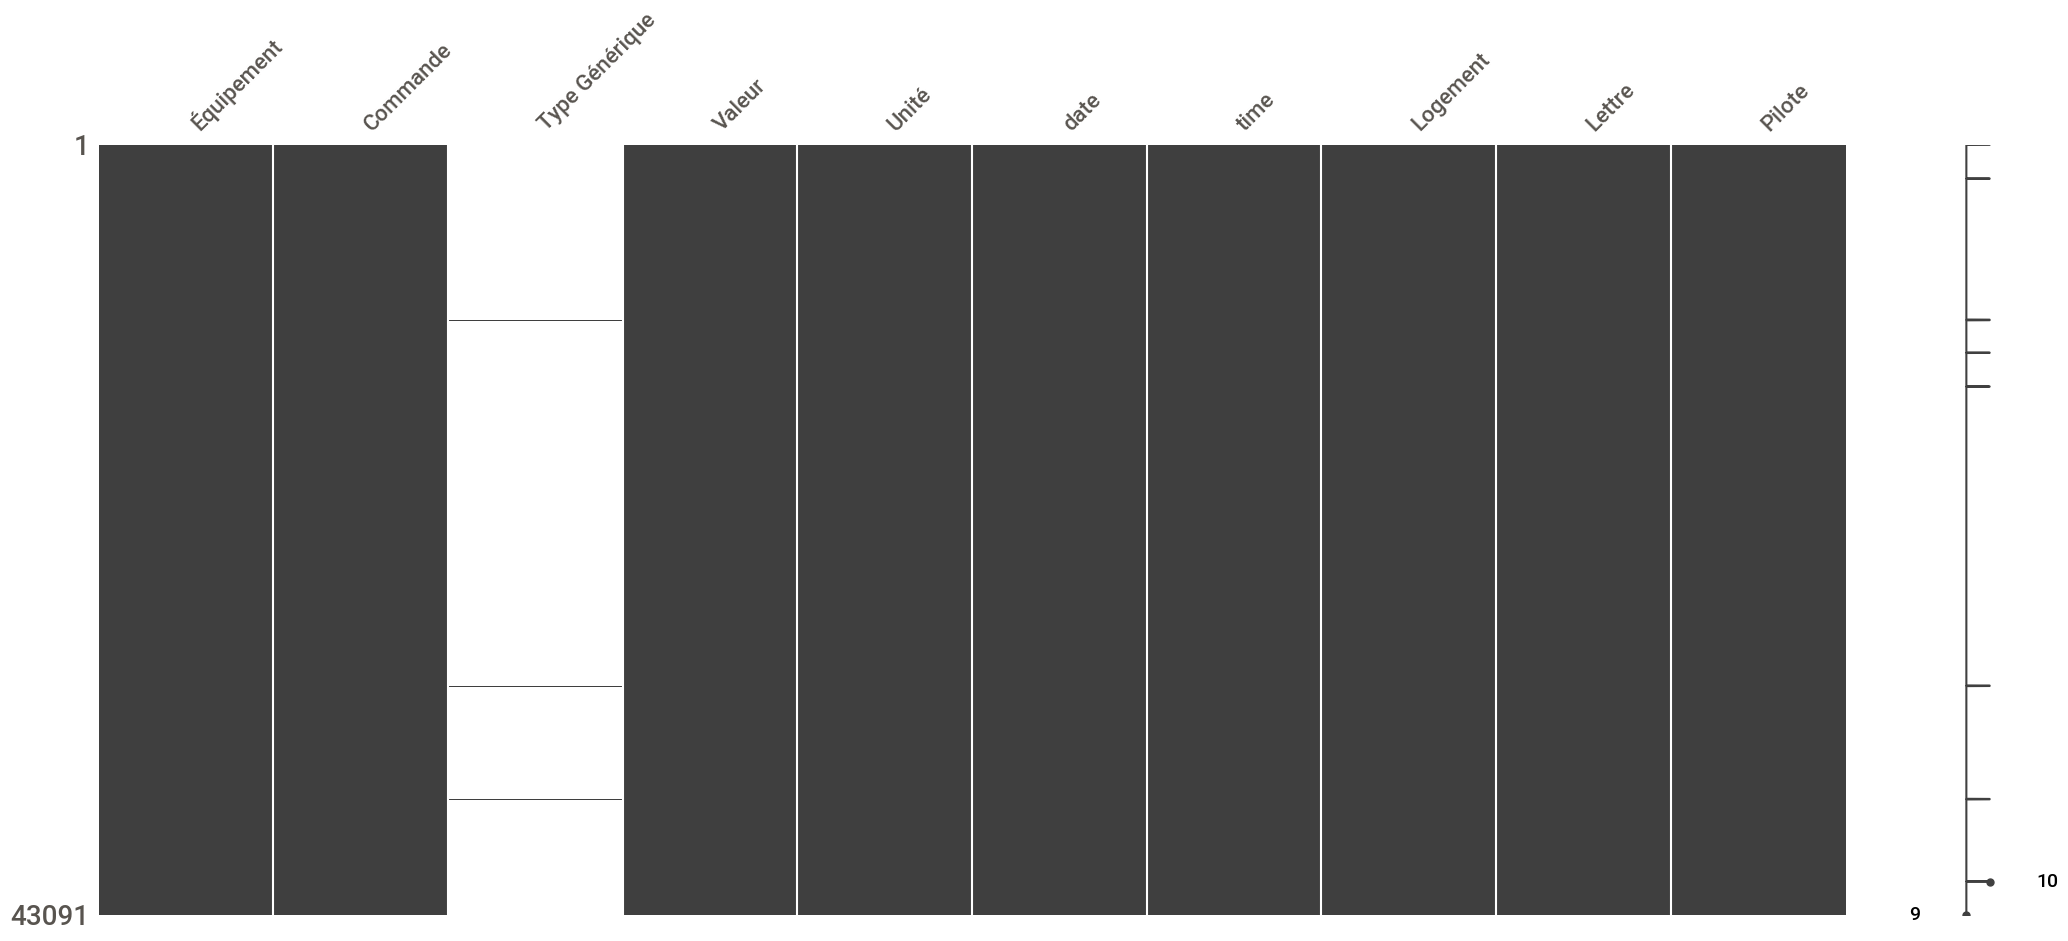

In [ ]:
msno.matrix(val_roland)

In [ ]:
# Description pour comprendre les données et mettre en suite le tableau en forme
dfSummary(val_roland)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Équipement[object],1. Conso_Total_index2. Thermostat3. Conso_horaire4. Chauffage5. Ballon_Eau6. Occupation_Hier7. TV-Frigo8. Occupation_Aujourdhui,"19,261 (44.7%)10,942 (25.4%)7,486 (17.4%)4,992 (11.6%)116 (0.3%)109 (0.3%)98 (0.2%)87 (0.2%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAC4CAYAAAD0WZ4UAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADA0lEQVR4nO3cQUocUQBF0V/SmGTSjQguIdmDi8his4heRPYgYg2icdIZBDIKUUh7qyjPWcFHLvWppp7T6XQaULhY+gC8H2IjIzYyYiMjNjJiIzONMT6NMS6XPsjKPJ9Op8elD7E1u+vr66/7/f5q6YOsyTzP99M0fRPcee32+/3V7e3t4+FweFr6MGvw8PDw8Xg8Xt3d3V2OMcR2RrsxxjgcDk83Nzc/lj7Minxa+gBb5AWBjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzG6M35/VLH2QtfC3eDu7eZ7vj8fj1fBZzR/zPN+PMZ6XPsfW+Cz873wW/gYm/36BytqfbJ4wG7LqwYvhybasdvBieLI9ax+8eEPeED/qkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkVnt4GWNZ+L/rHrwYniyLT4LJ2PwQsYLApn6GnUtvmPpuspa6n3L1lXWUtTrqtX9vELHCwIZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERuZbF1lLUW6rrKWet98Fk7GuorMOZ9snlr809kGL8YsvOQsgxdjFl7jnIMXYxb+yY+6ZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZM4yeDFm4TXONngxZuElPgsnY/BCxgsCGbGRuZim6cs0Td4meXMXY4zPY4wPSx+E7XONkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRuRhjfB9j/Fz6IGyfwQsZ1ygZsZExeCFj8ELGNUpGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZKyryFhXkXGNkhEbGesqMtZVZFyjZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDF7IGLyQcY2SERsZgxcyBi9kXKNkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsa6iox1FRnXKBmxkREbGbGRERsZsZH5Bb057jWeTR8NAAAAAElFTkSuQmCC"">",0(0.0%)
2,Commande[object],1. TIC_enedis2. TemperatureReelle3. Conso_Total_kw/h4. Chauffage_Conso5. Chauffage_Conso_Total6. Chauffage_OnOff7. Presence_absence8. Ballon_OnOff9. TV-Frigo_OnOff10. TemperatureDesiree,"19,261 (44.7%)10,872 (25.2%)7,486 (17.4%)1,936 (4.5%)1,629 (3.8%)1,427 (3.3%)196 (0.5%)116 (0.3%)98 (0.2%)70 (0.2%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAADnCAYAAAAJgSQ2AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAD00lEQVR4nO3dwW3bZgCG4Z+GkDYXCYYAj9Du4CEybIfQEN3BMKxDk+aiHpL2Ess5lHxJyM8zwQ/jBWkS/OzpcrkMKNytfQDeD7GRERsZsZERGxmxkREbGbGRERuZaYzxcYzxYe2DbMzXy+Xyee1D3Jrd8Xj8tN/v79c+yJacz+fnaZr+ENy8dvv9/v7x8fHz4XD4svZhtuDl5eXX0+l0//T09GGMIbYZ7cYY43A4fHl4ePhr7cNsyMe1D3CLPCCQERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGR2Y3x7bOatQ+yFX4Wy9mdz+fn0+l0P3xW85/z+fw8xvi69jlujc/CX+ez8AVM/ooRla1f2VxhbsimBy+GJ7dls4MXw5Pbs/XBiyfkG+KlLhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERG5nNDl62eCb+n00PXgxPbovPwskYvJCpr2yuVO9YOngxYHnfssGLAQv14GVzT7x0vNQlIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy2brKWop0XWUt9b7ZIJCxriLzsyubKxGzeXNdZQ3FnK6uq6yhmNvP1lXWUMzGS10yYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyVwcvBirM7c3Bi4EKc/JZOBmDFzJvXdlc1ZjV1cGLsQtze3XwYuzCEt4avBi7MCsvdcmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2Mi8OngxdmEJVwcvxi7MzWfhZAxeyHhAIHPtNuoWyuxeXVdZVrGEH9ZVllUs5dq6yrKK2XlAICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI/PDusqyiqW8uq6yrGIJPgsnY11F5t8r23AlY2m74/H4aYwxDFxY2t1+v7//vq669m8gYRbes5ERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkdl9H7eMYeDCwnwWTsbghYzf2ciIjczdNE2/T9PkTy6wuLsxxm9jjF/WPgi3z22UjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3M3RjjzzHG32sfhNtn8ELGbZSM2MgYvJAxeCHjNkpGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxm3UTJiI2PwQsbghYzbKBmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRsa4iY11Fxm2UjNjIiI2M2MiIjYzYyIiNjNjI/ANCMmlWN6g2QAAAAABJRU5ErkJggg=="">",0(0.0%)
3,Type Générique[object],1. nan2. ALARM_STATE3. THERMOSTAT_SETPOINT,"42,868 (99.5%)153 (0.4%)70 (0.2%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABeklEQVR4nO3csW3bUBiF0f8RRBw3JAQCGsHZQUO49Z4ZQkNkCUEsYlsNXdgeQfcB9DmVylt8EEmBT23btoKEofcAfo5WVY9V9av3EHbvNi7L8jxN06H3EvZtXdfLOE3T4XQ6vc7z/NZ7EPt0vV5/n8/nw1hVNc/z2/F4/N97FLv26AGBGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFj1ef7Rr2HsF

In [ ]:
# Mettre "Chauffage" si les conditions sont remplies
val_roland['Équipement'] = val_roland.apply(
    lambda row: 'Chauffage' if 'Chauffage_OnOff' in row['Commande']
    and row['Équipement'] == '4PM' else row['Équipement'], axis=1)

val_roland['Équipement'] = val_roland.apply(
    lambda row: 'Chauffage' if 'Chauffage_Conso' in row['Commande']
    and row['Équipement'] == '4PM' else row['Équipement'], axis=1)

val_roland['Équipement'] = val_roland.apply(
    lambda row: 'Chauffage' if 'Chauffage_Conso_Total' in row['Commande']
    and row['Équipement'] == '4PM' else row['Équipement'], axis=1)

# Mettre "Ballon_Eau" si les conditions sont remplies
val_roland['Équipement'] = val_roland.apply(
    lambda row: 'Ballon_Eau' if 'Ballon_OnOff' in row['Commande']
    and row['Équipement'] == '4PM' else row['Équipement'], axis=1)

# Mettre "TV-Frigo" si les conditions sont remplies
val_roland['Équipement'] = val_roland.apply(
    lambda row: 'TV-Frigo' if 'TV-Frigo_OnOff' in row['Commande']
    and row['Équipement'] == '4PM' else row['Équipement'], axis=1)


Rapport des données nettoyées :

In [ ]:
my_report = sv.analyze(val_roland)

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
my_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Rapport des données de Val Roland, binaire entre les appartements Piloté et les appartements non pilotés.

In [ ]:
my_report = sv.compare_intra(val_roland, val_roland["Pilote"] == "non piloté", ["Non piloté", "Piloté"])

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
my_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
# Vérifier les types de données pour validation
print(val_roland.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43091 entries, 0 to 43090
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Équipement      43091 non-null  object        
 1   Commande        43091 non-null  object        
 2   Type Générique  223 non-null    object        
 3   Valeur          43091 non-null  object        
 4   Unité           43091 non-null  object        
 5   date            43091 non-null  datetime64[ns]
 6   time            43091 non-null  object        
 7   Logement        43091 non-null  object        
 8   Lettre          43091 non-null  object        
 9   Pilote          43091 non-null  object        
dtypes: datetime64[ns](1), object(9)
memory usage: 3.3+ MB
None


In [ ]:
val_roland['Valeur'] = pd.to_numeric(val_roland['Valeur'].str.replace(',', '.'), errors='coerce')